### Афанасьев Д.М., РК№2, ИУ5Ц-81Б, вариант №26

Задание: Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

|Метод 1|Метод 2|
|-------|-------|
|Линейная/логистическая регрессия|Случайный лес|

Набор данных: https://www.kaggle.com/datasets/brsdincer/star-type-classification

# Ход выполнения работы

## Текстовое описание набора данных

Этот набор данных, предоставленный NASA, предназначен для классификации звезд по типу. Он может быть использован для изучения различных астрономических явлений, таких как образование и эволюция звезд.

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

Подключаем Dataset

In [86]:
data = pd.read_csv('Stars.csv', sep=",")

# Заполнение пропущенных значений (если они есть)

In [87]:
# Заполнение пропущенных значений вперед (ffill) и назад (bfill)
data.ffill(inplace=True)
data.bfill(inplace=True)


# Кодирование категориальных признаков

In [88]:
# Преобразование категориальных признаков "Color" и "Spectral_Class" в числовые значения
label_encoder = LabelEncoder()

# Вывод уникальных значений до преобразования
print("Уникальные значения признака 'Color' до преобразования:", data['Color'].unique())
print("Уникальные значения признака 'Spectral_Class' до преобразования:", data['Spectral_Class'].unique())

data['Color'] = label_encoder.fit_transform(data['Color'])
data['Spectral_Class'] = label_encoder.fit_transform(data['Spectral_Class'])

# Вывод уникальных значений после преобразования
print("Уникальные значения признака 'Color' после преобразования:", data['Color'].unique())
print("Уникальные значения признака 'Spectral_Class' после преобразования:", data['Spectral_Class'].unique())


Уникальные значения признака 'Color' до преобразования: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Уникальные значения признака 'Spectral_Class' до преобразования: ['M' 'B' 'A' 'F' 'O' 'K' 'G']
Уникальные значения признака 'Color' после преобразования: [ 8  1  9 13  2  7  0  4 11 15  5 10 14 16 12  6  3]
Уникальные значения признака 'Spectral_Class' после преобразования: [5 1 0 2 6 4 3]


# Визуализация данных

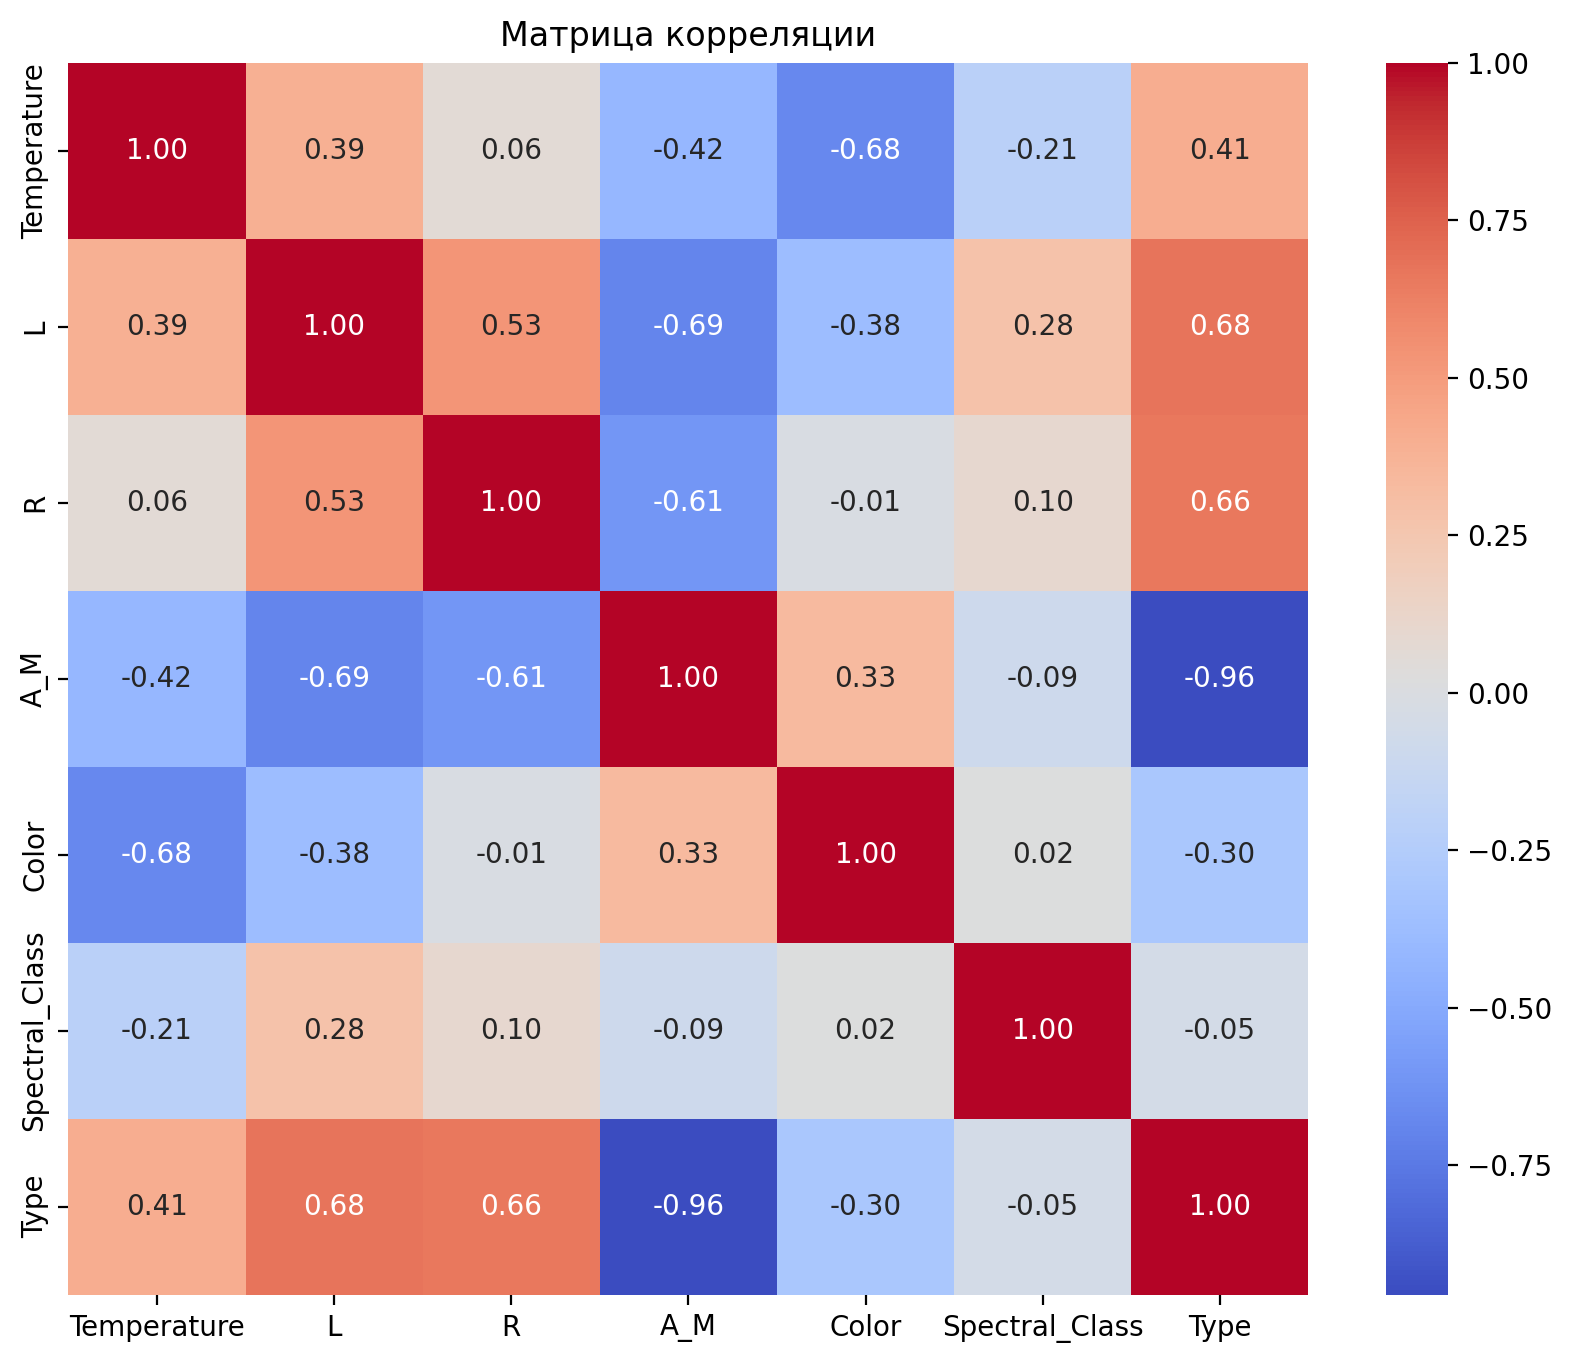

In [89]:
# Матрица корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

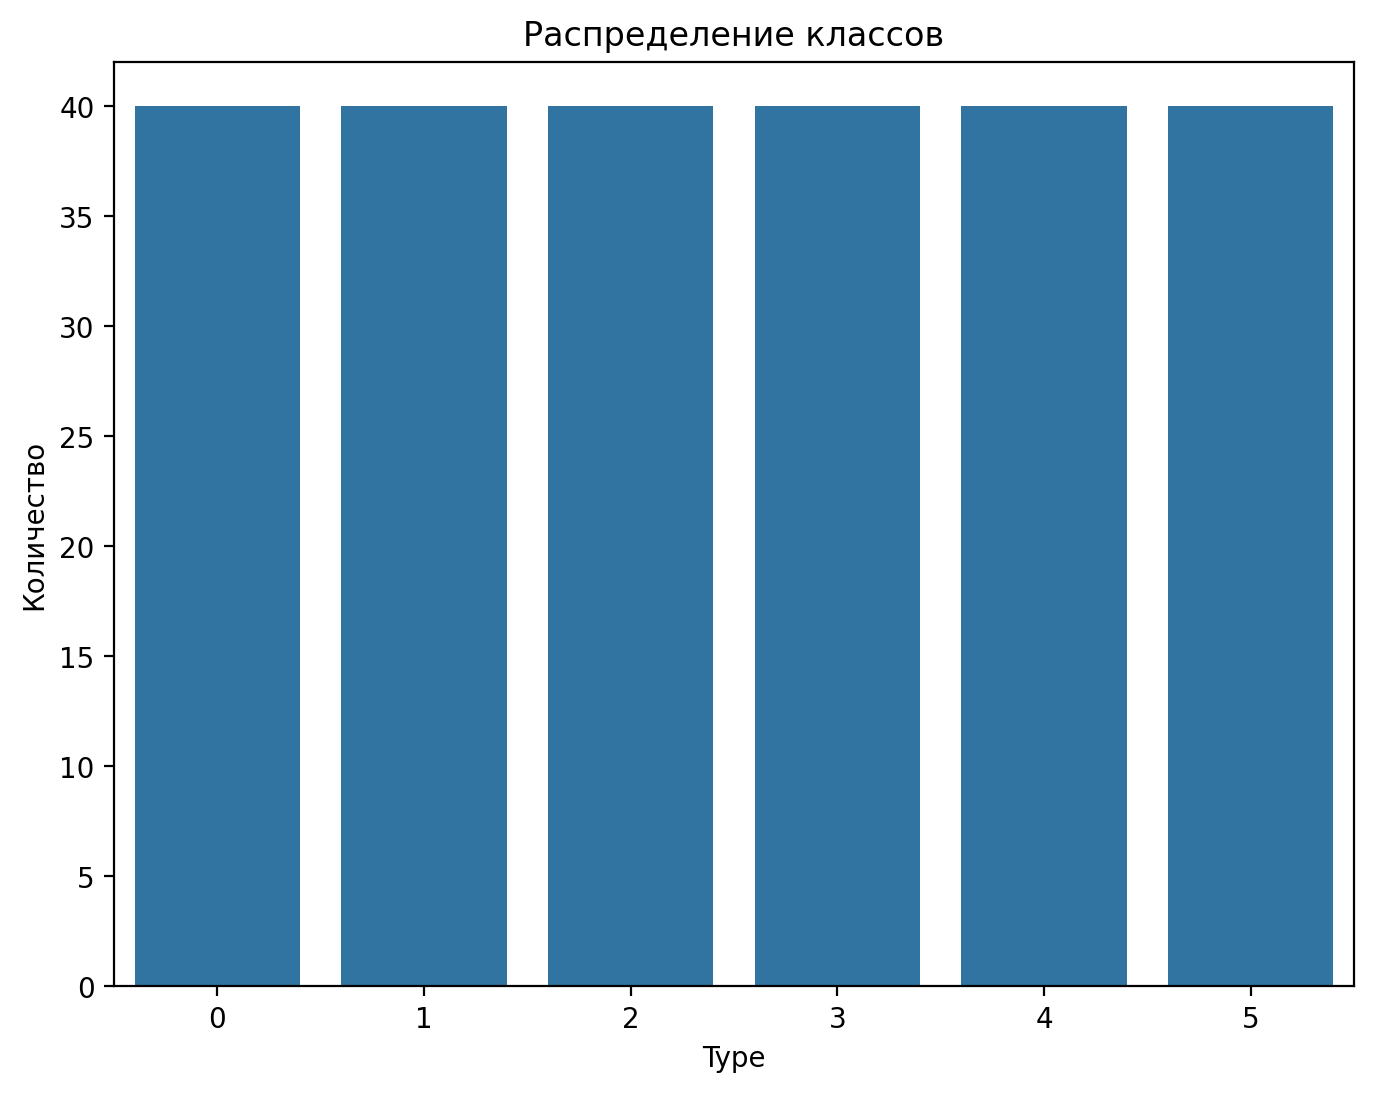

In [90]:
# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data)
plt.title('Распределение классов')
plt.xlabel('Type')
plt.ylabel('Количество')
plt.show()

# Разделение данных на обучающий и тестовый наборы

In [91]:
X = data.drop('Type', axis=1)  # Все столбцы, кроме 'Type', как признаки
y = data['Type']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Построение моделей

In [92]:
# Метод №1: Линейная/Логистическая регрессия
logistic_model = LogisticRegression(max_iter=10000, solver='saga')  # Изменение solver
logistic_model.fit(X_train, y_train)  # Обучение модели на обучающих данных
logistic_predictions = logistic_model.predict(X_test)  # Прогнозирование на тестовых данных


In [93]:
# Метод №2: Случайный лес
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Создание модели
random_forest_model.fit(X_train, y_train)  # Обучение модели на обучающих данных
random_forest_predictions = random_forest_model.predict(X_test)  # Прогнозирование на тестовых данных


In [96]:
# Оценка качества модели логистической регрессии
print("Метод №1: Линейная/Логистическая регрессия")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))  # Точность модели
print("Отчет о классификации:")
print(classification_report(y_test, logistic_predictions, zero_division=1))  # Отчет о классификации


Метод №1: Линейная/Логистическая регрессия
Accuracy: 0.5
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       1.00      0.00      0.00         7
           2       0.23      1.00      0.38         6
           3       1.00      0.25      0.40         8
           4       0.67      1.00      0.80         8
           5       1.00      0.73      0.84        11

    accuracy                           0.50        48
   macro avg       0.82      0.50      0.40        48
weighted avg       0.85      0.50      0.44        48



In [97]:
# Оценка качества модели случайного леса
print("Метод №2: Случайный лес")
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))  # Точность модели
print("Отчет о классификации:")
print(classification_report(y_test, random_forest_predictions))  # Отчет о кла

Метод №2: Случайный лес
Accuracy: 1.0
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



# Визуализация важности признаков для модели случайного леса

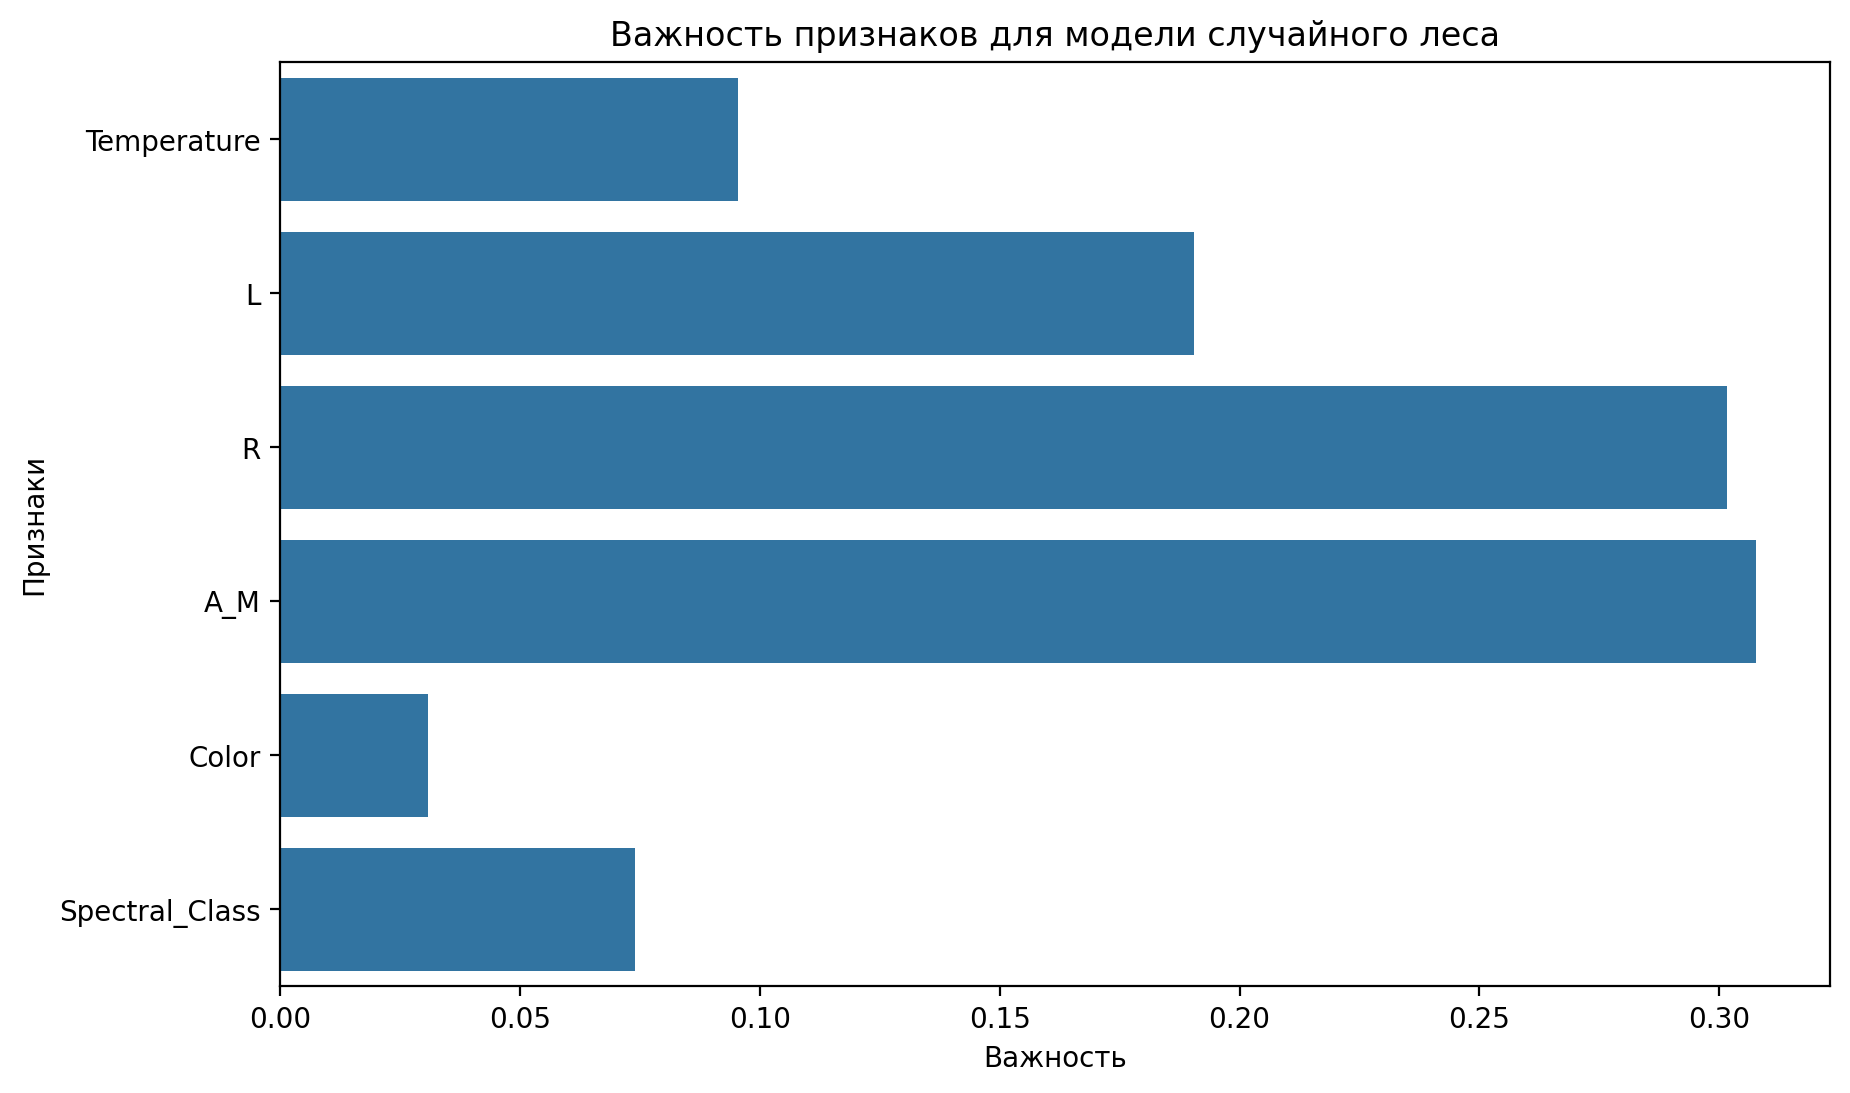

In [98]:
feature_importances = random_forest_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, orient='h')
plt.title('Важность признаков для модели случайного леса')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

# Вывод

При сравнении результатов двух моделей машинного обучения на данных о классификации звезд становится ясно, что модель случайного леса немного лучше справляется с предсказаниями по сравнению с моделью логистической регрессии. Обе модели достаточно точно определяют типы звезд, но неравномерное распределение различных типов звезд может влиять на точность оценки их классификации.